# Employees Data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
plt.style.use('dark_background')

### Checking the data:

In [2]:
df=pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

### Seperating data of Employees who left the company and the ones who are still working for the company:

In [4]:
len(df[df['left']==0])

11428

In [5]:
len(df[df['left']==1])

3571

In [6]:
df_left=df[df['left']==1]
df_left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [7]:
df_retain=df[df['left']==0]
df_retain

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


### Comparing the numerical data of detained employees with that of retained employees:

In [8]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


## Data insights:

1. Satisfaction level of detained employees is 34% less than retained employees.
2. Detained employees used to spend 13% more time in company than retained employees.
3. The average work hours of detained employees are 4% higher than the retained employees.
4. Employees who are promoted are likely to be retained by the company.
5. Work accident among the detained employees is significantly lower when compared to retained employees (27%).

## Bar charts showing the impact of employees salaries on retention:

In [9]:
salary_types=df['salary'].unique()
salary_types

array(['low', 'medium', 'high'], dtype=object)

In [10]:
xplot=np.arange(len(salary_types))
xplot

array([0, 1, 2])

In [11]:
y_detained=df_left['salary'].value_counts()
y_detained

low       2172
medium    1317
high        82
Name: salary, dtype: int64

In [12]:
y_retained=df_retain['salary'].value_counts()
y_retained

low       5144
medium    5129
high      1155
Name: salary, dtype: int64

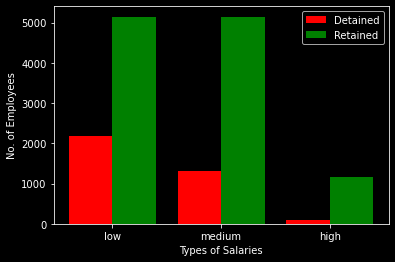

In [13]:
plt.xticks(xplot,salary_types)
plt.bar(xplot-0.2,y_detained,color='red',label='Detained',width=0.4)
plt.bar(xplot+0.2,y_retained,color='green',label='Retained',width=0.4)
plt.xlabel('Types of Salaries')
plt.ylabel('No. of Employees')
plt.legend()
plt.show()

## Insights on the impact of employee detention due to salaries:

1. 29.6% Employees having low salary had left the company (3 out 10 employees leave the company)->0.30~
2. 20.4% Employees having medium salary had left the company (1 out of 5 employees leave the company)->0.20
3. 6.6% Employees having higher salary had left the company (3 out of 50 employees leave the company)->0.06

### Conclusion:
Employees with higher salary are less likely to leave the company

## Bar chart showing the corelation between department and employee retention

In [14]:
departments=df['Department'].unique()
departments

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [15]:
xplot=np.arange(len(departments))
xplot

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
y_detained=df_left['Department'].value_counts()
y_detained

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: Department, dtype: int64

In [17]:
y_retained=df_retain['Department'].value_counts()
y_retained

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: Department, dtype: int64

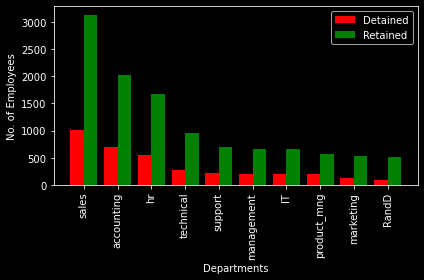

In [18]:
plt.xticks(xplot,departments,rotation=90)
plt.bar(xplot-0.2,y_detained,label='Detained',color='red',width=0.4)
plt.bar(xplot+0.2,y_retained,label='Retained',color='green',width=0.4)
plt.xlabel('Departments')
plt.ylabel('No. of Employees')
plt.tight_layout()
plt.legend()
plt.show()

In [19]:
for i in range(len(y_detained)):
    per=(y_detained[i]/(y_detained[i]+y_retained[i]))*100
    print(f'{per}')

24.492753623188406
25.624999999999996
24.89905787348587
22.249388753056234
23.39499455930359
23.448275862068964
23.65967365967366
26.018396846254927
18.333333333333332
14.796747967479677


### Insights from the department detention rate:
Almost all the departments have equal detention rate, hence this won't influence the detention of employees

## Final Conclusions:

The factors that show a significant impact on employees detention are:
1. satisfaction_level
2. average_monthly_hours
3. time_spend_company
4. promotion_last_5years
5. Work_accident
6. salary

## Preparing data:

In [21]:
y=df['left']
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [22]:
df1=df[['satisfaction_level','average_montly_hours','time_spend_company','promotion_last_5years','Work_accident','salary']]
df1

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,Work_accident,salary
0,0.38,157,3,0,0,low
1,0.80,262,6,0,0,medium
2,0.11,272,4,0,0,medium
3,0.72,223,5,0,0,low
4,0.37,159,3,0,0,low
...,...,...,...,...,...,...
14994,0.40,151,3,0,0,low
14995,0.37,160,3,0,0,low
14996,0.37,143,3,0,0,low
14997,0.11,280,4,0,0,low


In [23]:
s=pd.get_dummies(df['salary'],prefix='salary')
s

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [24]:
df1=pd.concat([df1,s],axis=1)
df1

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,Work_accident,salary,salary_high,salary_low,salary_medium
0,0.38,157,3,0,0,low,0,1,0
1,0.80,262,6,0,0,medium,0,0,1
2,0.11,272,4,0,0,medium,0,0,1
3,0.72,223,5,0,0,low,0,1,0
4,0.37,159,3,0,0,low,0,1,0
...,...,...,...,...,...,...,...,...,...
14994,0.40,151,3,0,0,low,0,1,0
14995,0.37,160,3,0,0,low,0,1,0
14996,0.37,143,3,0,0,low,0,1,0
14997,0.11,280,4,0,0,low,0,1,0


In [25]:
df1=df1.drop(['salary','salary_low'],axis=1)  #Label Encoding
df1

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,Work_accident,salary_high,salary_medium
0,0.38,157,3,0,0,0,0
1,0.80,262,6,0,0,0,1
2,0.11,272,4,0,0,0,1
3,0.72,223,5,0,0,0,0
4,0.37,159,3,0,0,0,0
...,...,...,...,...,...,...,...
14994,0.40,151,3,0,0,0,0
14995,0.37,160,3,0,0,0,0
14996,0.37,143,3,0,0,0,0
14997,0.11,280,4,0,0,0,0


In [26]:
x_train,x_test,y_train,y_test=train_test_split(df1,y,test_size=0.1,random_state=10)

In [27]:
x_train

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,Work_accident,salary_high,salary_medium
9292,0.18,208,6,0,0,0,1
9307,0.68,165,3,0,0,0,1
4017,0.69,186,3,0,0,0,0
14501,0.40,128,3,0,0,0,0
9243,0.14,215,5,0,0,0,0
...,...,...,...,...,...,...,...
11633,0.77,269,10,0,0,1,0
1344,0.39,150,3,0,0,0,0
12815,0.80,236,3,0,1,0,0
7293,0.97,152,2,0,0,0,1


In [28]:
x_test

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,Work_accident,salary_high,salary_medium
13982,0.65,125,4,0,0,0,0
822,0.41,128,3,0,0,0,0
13751,0.44,125,7,0,0,0,1
9656,0.93,190,5,0,0,0,1
13497,0.76,170,6,0,0,0,1
...,...,...,...,...,...,...,...
5946,0.98,200,2,0,0,0,1
285,0.40,148,3,0,0,0,0
7058,0.71,107,4,0,0,0,1
6277,0.97,228,4,0,0,0,0


In [29]:
y_train

9292     0
9307     0
4017     0
14501    1
9243     0
        ..
11633    0
1344     1
12815    0
7293     0
1289     1
Name: left, Length: 13499, dtype: int64

In [30]:
y_test

13982    0
822      1
13751    0
9656     0
13497    0
        ..
5946     0
285      1
7058     0
6277     0
9179     0
Name: left, Length: 1500, dtype: int64

### training data:

In [31]:
log_reg=LogisticRegression()

In [32]:
log_reg.fit(x_train,y_train)

LogisticRegression()

### Testing our model:

In [34]:
log_reg.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
y_test

13982    0
822      1
13751    0
9656     0
13497    0
        ..
5946     0
285      1
7058     0
6277     0
9179     0
Name: left, Length: 1500, dtype: int64

In [36]:
log_reg.score(x_test,y_test)

0.7713333333333333